# NN is highly parameterized model

- artificial neural networks (ANN), simply called NN

- NN are highly **parameterized**, so it's very flexible and can learn any **continuous** function and approximate discrete functions

- the more number of params, the more fitness of model

## why go deep? 

- depth = complexity

- different layers learn different functions

- single layer perceptron can only handle linear separability

## design choice

- activation function


- cost function


- number of layers


- dim of layers


- connections between layers


- regularizations: layers/batch

## how to debug a NN?

- change learning rate 


- initialize differently

    if we initialize all the params to be 0s,
    
    neurons may hard to be activated,
    
    so we can randomly initialize params
    

- more training data


- change architecture


- run for more epochs


- feature selection

# learning

- def of learning: a computer program is said to learn from experience $E$ if its performance at tasks T measured by P **improves** with experience E
     
- E: a set of data

- T: hard code in algo

- P: a loss function, optimized w.r.t training data or data we know answer

# loss function

- loss function $L: \mathcal{Y} \times \mathcal{Y} \rightarrow \mathbb{R}$
    
- loss function has many choices, the only criteria for loss function is **differentiable**

- a convex loss function can be solved by **differentiation**, has analytical solution.

- most ML problems have non-convex loss function, use gradient descent to get a **local minimum**
    
    

# optimization

- optimization = learning = loss minimization


- a convex loss function can be solved by **differentiation**

    is guaranteed to reach the minimum where **derivative = 0**


- rolling ball analogy:

    start at a random point, ball goes down along the valley
    
    can simulate this by computing 1st and 2nd derivatives of cost function
    
    these derivatives tell the shape of valley and how the ball should roll.


- most of ML and NN problems have non-convex loss function,

    but we can still use gradient descent to get a **local minimum** with loss gone small as much as possible

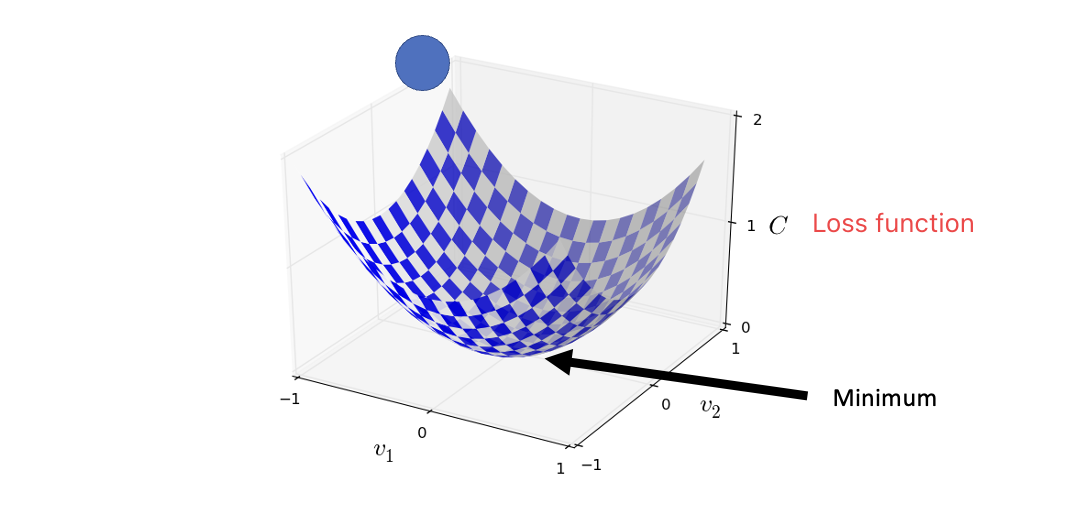

- define $\Delta v = (\Delta v_1, \Delta v_2)^T$

    gradient of C is 
    
    $$
    \nabla C = \left ( \frac{\partial C}{\partial v_1}, \frac{\partial C}{\partial v_2} \right )^T
    $$
    
    
- given 

$$
\nabla C = \frac{\partial C}{\partial \textbf{v}} \approx \frac{\Delta C}{\Delta \textbf{v}}
$$

$\Rightarrow \Delta C \approx \nabla C \cdot \Delta \textbf{v}$


- to make gradient descent to 0,

    how to choose $\Delta \textbf{v}$ to make sure $\Delta C <0$?
    

- we can choose $\Delta \textbf{v} = - \eta \nabla C$

$\eta$ is learning rate: a small, positive parameter

$\Rightarrow \Delta C \approx \nabla C \cdot \Delta \textbf{v} = \Delta C (- \eta \nabla C) = - \eta \left\| \nabla C\right\|_2^2 \leq 0$


- param $v$ is updated by following until reach the minimum of loss function

$$
v \rightarrow v + \Delta v = v - \eta \nabla C
$$

## linear regression optimization

- suppose we want to fit a linear function f to a dataset $D = \left\{(x_1, y_1),...,(x_n, y_n) \right\}$

$$
f(\textbf{x};\textbf{w}) = \textbf{w}^T\textbf{x} + w_0
$$

where $\textbf{w} \in \mathbb{R}^p$ is weight/coefficient,

$\textbf{x} \in \mathbb{R}^p$ is a sample  

$w_0$ is a constant offset


- loss function is squared error

$$
\textbf{w}^* =\arg \min_{\textbf{w}} L(\textbf{w}; D)
= \arg \min_{\textbf{w}} \sum _{i=1}^n \left (\hat y_i - y_i \right )^2
$$

$$
= \arg \min_{\textbf{w}} \sum _{i=1}^n \left [f(\textbf{x}_i;\textbf{w}) - y_i \right ]^2
=\arg \min_{\textbf{w}} \sum _{i=1}^n \left (\textbf{w}^T\textbf{x}_i + w_0 - y_i \right )^2
$$

- to solve this loss function,

    take gradient of loss function w.r.t param $\textbf{w}$
    
    set gradient = 0 for each i
    
    $$
    \frac{\partial L(\textbf{w}; D)}{\partial \textbf{w}_i}=0
    $$
    
    for $\textbf{x} \in \mathbb{R}^d$, results in $d+1$ equations and $d+1$ unknown parameters ($d$ $\textbf{w}_i$ and $1\  \textbf{w}_0$)
    
    can be solved **analytically** because it's a convex loss

## gradient descent

- we can create learning algo that automatically tune the weights and biases with Gradient descent


- tuning occurs in response to external stimuli and without direct intervention

    create a net designed for the problem at hand
    

1. take derivative of loss function w.r.t output weight,

    the loss function maybe analytically differentiable or may not be convex
 
 
2. propagate that backward all the way to input using a procedure called **backpropagation**

### SGD with momentum

towards datascience: https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d

- a momentum $V$: an exponentially weighted moving average of gradients.

$$
W \leftarrow W - \alpha V_t  \\[1em]

V_t = \beta V_{t-1} + (1-\beta) \nabla_w L(W, X, y)
$$

$\alpha$: learning rate

$\beta \in [0, 1]$: a constant facter represents degree of weighting $V$ decrease

$V_t$: momentum at t-th step, decrease exponentially through time


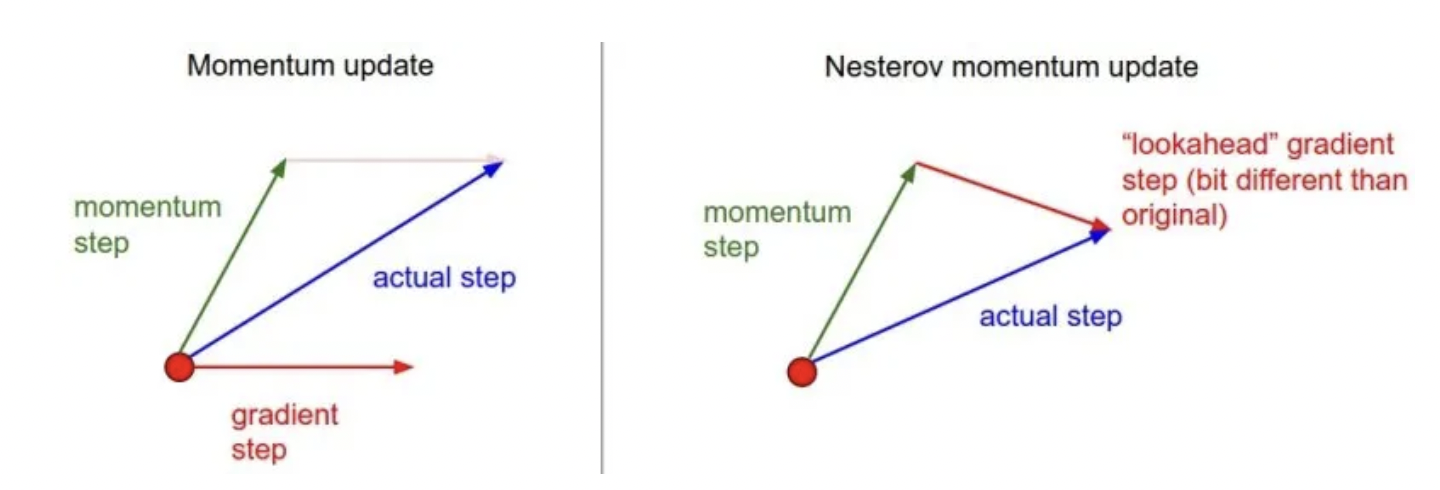

- why momentum is better than SGD?

    SGD: estimate gradient by derivative over a small batch, can be noisy, momentum uses weighted average gradient, can smooth the gradient.
    
    ravines 小峡谷 are common near local minimas, SGD tend to oscillate across the narrow ravine; momentum accelerate gradients vectors in the right directions, thus faster converging
    

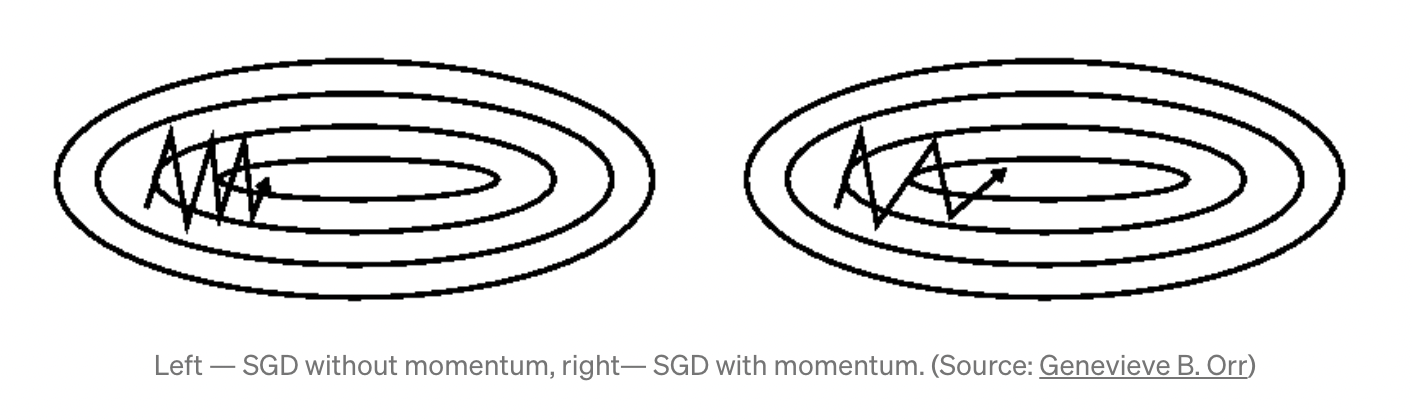

### when get closer to solution, does increase/decrease learning rate help?


- intuition: decrease learning rate

- true: tricky, when gradient get closer to 0, decreasing learning rate may slow down the convergence


# regularization

- regularization express **inductive bias** in the solution: smooth or sparse

- if we have preference for some solutions, we can add a **regularization term** to loss function


- Ridge regression (L2 regularization, weight decay): penalize with L2 norm

    some weights $\rightarrow 0$
    
$$
\textbf{w}^* =\arg \min_{\textbf{w}} \sum_i^n L( f(\textbf{x}_i;\textbf{w}, y_i) + \lambda \sum_{j=1}^m w_j^2
$$

closed form solution:

$$
\textbf{w}^* = (\lambda I + X^TX) ^{-1}X^T \textbf{y}
$$

- Lasso regression (L1 regularization): penalize with L1 norm

    if we prefer solutions have sparse coefficients, easy for interpretation
    
    some weights = 0
    
$$
\textbf{w}^* =\arg \min_{\textbf{w}} \sum_i^n L( f(\textbf{x}_i;\textbf{w}, y_i) + \lambda \sum_{j=1}^m |w_j|
$$  

no closed form solution but still convex,

so we can use gradient descent to find optimal solution

# MLP (multilayer perceptron)

## perceptron

- each individual neuron is called perceptron,

    mimic how a neuron at a time is on fire
    

- perceptron is developed in 1950's and 1960's 


- binary inputs and single binary output

- how to compute output: assign weights to each dimension of input, determine if weighted sum of input > some threshold $T$
$$
\textbf{w}^T\textbf{x} = \sum _{j=1}^p w_j x_j
$$

$$
\text{output} = \left\{\begin{matrix}
0 & \textbf{w}^T\textbf{x}\leq T \\
1 & \textbf{w}^T\textbf{x} > T \\
\end{matrix}\right.
$$

## MLP

- a single perceptron is pretty simple


- a complex network of perceptrons can be any logic functions and make subtle decisions


- MLP: chain perceptrons by multiple layers

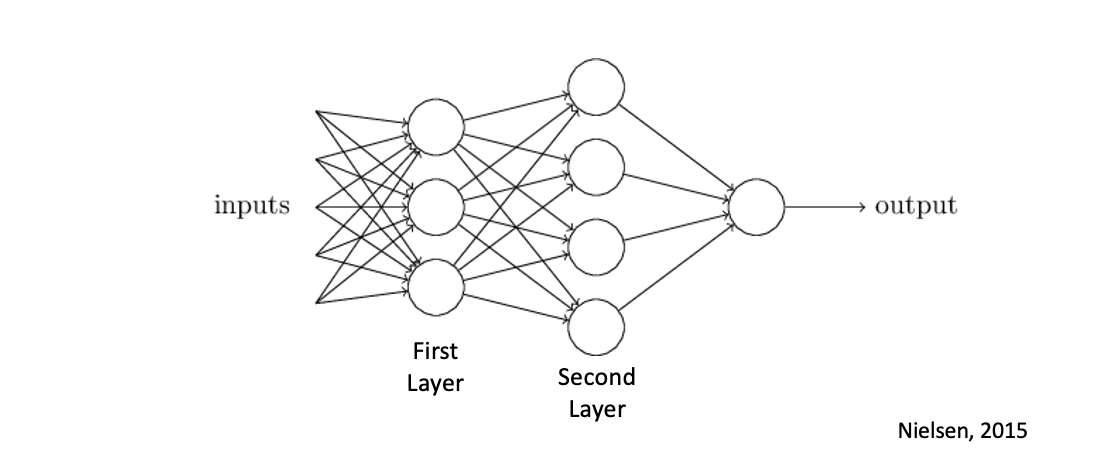

## bias

- bias is a measure of ease in firing the perceptron


- for MLP, threshold is replaced with bias $b$

$$
b = - \text{threshold}
$$

$$
output = \left\{\begin{matrix}
0 &  \textbf{w}\textbf{x}+b \leq 0 \\
1 &  \textbf{w}\textbf{x}+b > 0 \\
\end{matrix}\right.
$$

## how can we make any logic function with perceptron?

- because a NAND gate is universal for logic, 

    any logic can be built from chains of NAND gates

    so perceptrons are universal for logic


    
    | input      | output |
    | ----------- | ----------- |
    | 00      | 1       |
    | 01 or 10   | 1        |
    | 11  | 0        |

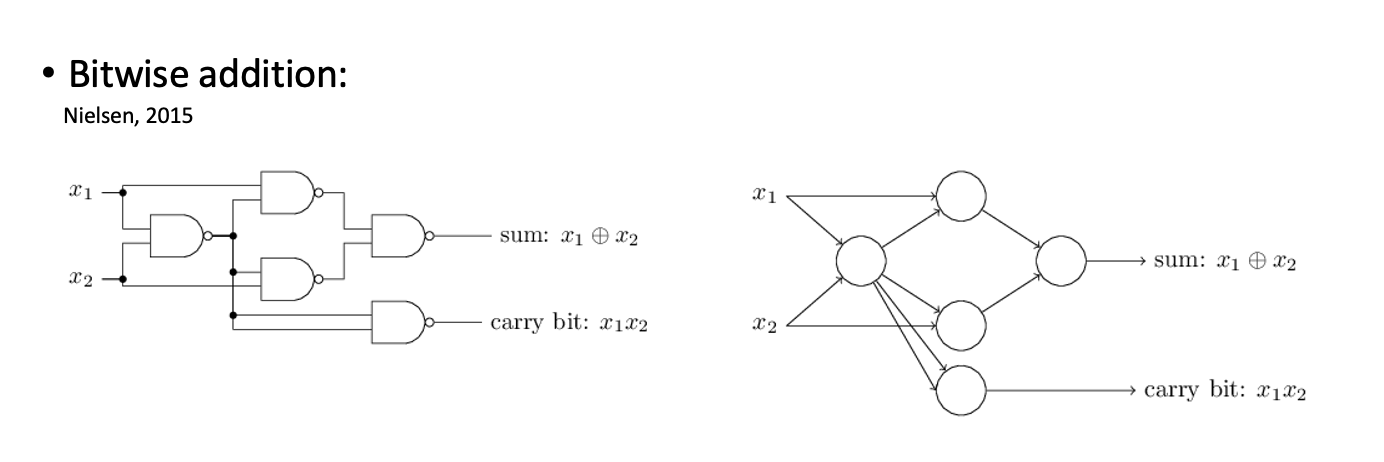

## problem with perceptron 

- hard to tune : small change in weight can lead to **large/no** changes in output

- modern NN don't have perceptrons or logical behavior,

    instead have **continuous differentiable activation** function such as sigmoid

    ad: small change in any weight (or bias) causes a **small** change in the output

## sigmoid neuron

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Activation function')

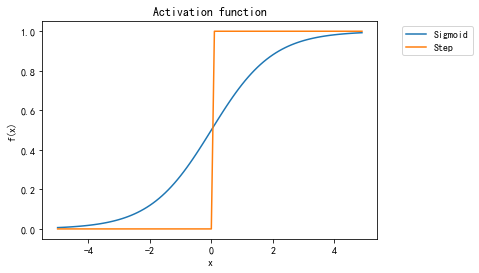

In [12]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5, 5, 0.1)

plt.plot(x, sigmoid(x), label="Sigmoid")
plt.plot(x, np.where(x<0, 0, 1), label='Step')
plt.legend(bbox_to_anchor=(1.3, 1))
plt.xlabel("x")
plt.ylabel("f(x)")

plt.title("Activation function")

$$
\sigma(z) = \frac{1}{1+ e^{-z}} \in (0, 1)
$$

- derivative of sigmoidal function

$$
\frac{\partial \sigma(z)}{\partial z}=\sigma(z) [1- \sigma(z)]
$$

- a sigmoid neuron is a continuous version of perceptron,
    
- sigmoid function still looks like a step, but don't have hard threshold 0

    it gives intermediate value between 0 and 1


- smoothness of sigmoid function 

    $\Rightarrow$ small changes to weights and biases $\Rightarrow$ small changes in output
    

- smoothness and ease of differentiability of sigmoid function give **tunability**,

    we can change multiple sigmoids on neuron and learn by gradient descent